<a href="https://colab.research.google.com/github/jorgeP16/IA_2025/blob/main/EDA_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis eda
conjunto de estadisticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos

pasos


1.   Realizar un analisis descriptivo
2.   Elemento de la lista
3.   Detectar y tratar datos ausentes (NaN)
4.   Identificar datos atípicos y tratarlos






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/titanic-train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


1. Definir el problema
- caracterizar quienes sobrevivieron a la tragedia del Titanic
-Jack se hubiera salvado si Rose le hubiera permitido subir a la puerta

2. Exploracion de datos
* Survived: 0 = Murió, 1 = sobrevivio
* Pclass: Clase del tiquete. 1 = 1st, 2 = 2nd, 3 = 3rd
* sisbsp # de hermanos
* parch:# de padres/hijos
* cabin: No. de la cabina
* embarked: Punto de embarque C=chebourg, q=queenstown, s=southamphon


In [10]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [11]:
porcentaje=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentaje

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


##Analizando la relacion entre las caracteristicas con la probabilidad de supervivencia/mortalidad del TITANIC

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
def bar_chart(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Dead']
  test.plot(kind='bar',stacked=True,figsize=(10,5))


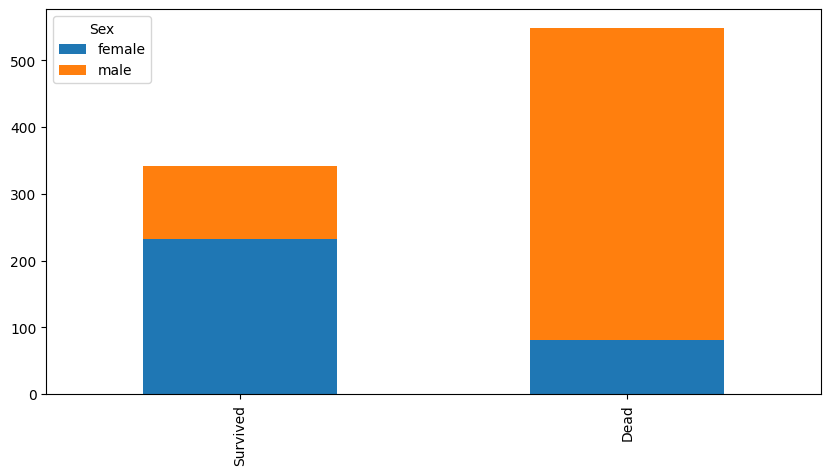

In [17]:
bar_chart("Sex")

La grafica señala que las mujer tiene casi 3 veces más posibilidades de sobrevivir que los hombre.

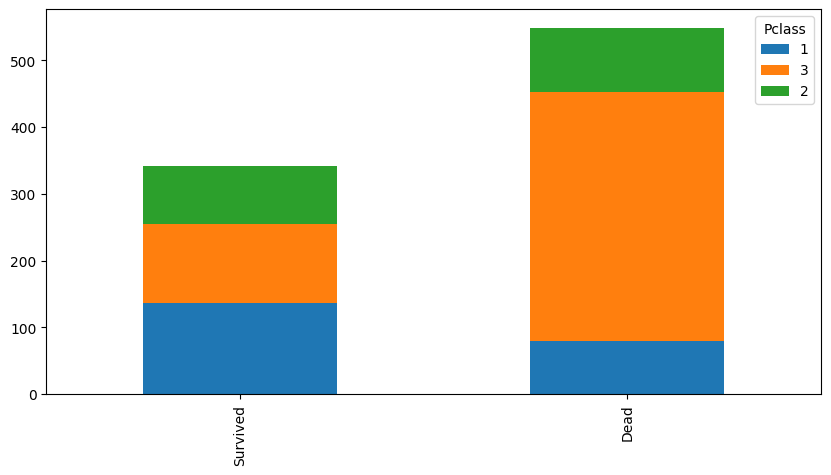

In [18]:
bar_chart("Pclass")

La grafica señala que la clase alta tuvo mayot probabilidad de supervivencia con respescto a
**otras clases.**
La grafica señala que la clase 3 **fallecio mas** en comparacion a **otras clases**

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

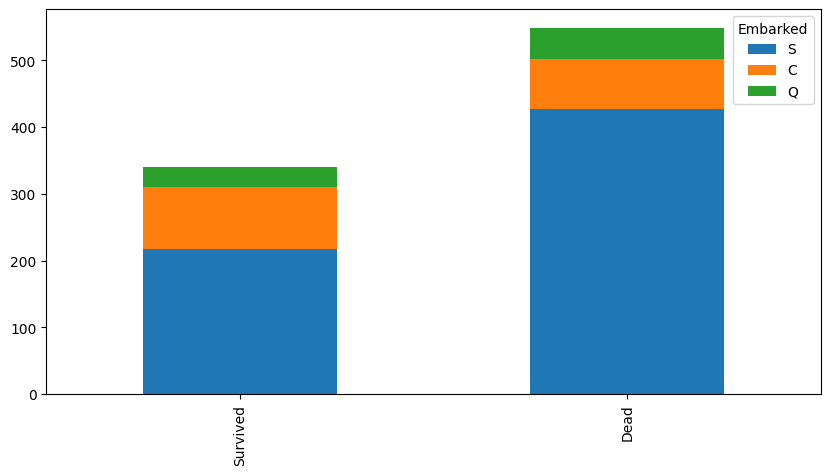

In [19]:
bar_chart("Embarked")

La grafica confirma que
* una persona que **aborda desde C** tuvo una ligera probabilidad de sobrevivir
* si una persona que aborda **Q o S** probablemente murio

## Ingenieria de caracteristicas
Es el proceso de usar el dominio del conocimiento para crear nuevas caracteristicas (feature vector) y que logre que los algoritmos de machine_learning funcione correctamente.
Feature vector es un vector n-dimensional que representa un objeto. Muchos algortimos de ML requieren una representacion numerica de los